# Logistic Regression with Neural Network

I implemented logistic regression in this notebook. I wrote everything by hand and used sign data language. Since I used logistic regression, I created a model that classifies only 1s and 0s.

In [1]:
# İmporting Datasets
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [2]:
# Seperate dataset as test, train
X = np.load('dataset/X.npy')
Y = np.load('dataset/Y.npy')

# We need to get only zero's and one's
X = np.concatenate((X[204:409], X[822:1027] ), axis=0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (410, 64, 64)
Y shape: (410, 1)


In [3]:
from sklearn.model_selection import train_test_split
train_set_x_orig, test_set_x_orig, train_set_y, test_set_y = train_test_split(X, Y, test_size=0.15, random_state=42)

In [4]:
#Flatten Train and Test Data
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1)

print("X train flatten: ",train_set_x_flatten.shape)
print("X test flatten: ",test_set_x_flatten.shape)

X train flatten:  (348, 4096)
X test flatten:  (62, 4096)


In [5]:
train_set_x = train_set_x_flatten.T
test_set_x = test_set_x_flatten.T
train_set_y = train_set_y.T
test_set_y = test_set_y.T
print ("train_set_x shape: " + str(train_set_x.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x shape: (4096, 348)
test_set_x shape: (4096, 62)
train_set_y shape: (1, 348)
test_set_y shape: (1, 62)


In [6]:
# Sigmoid Function
def sigmoid(z):
    
    a = 1/(1+np.exp(-1*z))
    
    return a

In [7]:
# Initializing weights and bias
def initializing_parameters(dimension):
    
    w = np.full((dimension,1), 0.01)
    b = 0
    
    return w,b

In [8]:
# Forward and Backward propagation
def forward_and_backward(w, b, X, Y):
    
    m = X.shape[1] #number of example
    # FORWARD
    # Calculating A and cost  
    A = sigmoid(np.dot(w.T,X)+b)                                    
    cost = (-1/m) * np.sum(Y*np.log(A)+((1-Y)*np.log(1-A)))
    
    # BACKWARD PROPAGATION
    # Calculating derivative of dw and db
    dw = (1/m)*(np.dot(X,np.subtract(A,Y).T))
    db = (1/m)* np.sum(A-Y)
    
    gradients = {"dw": dw,
                 "db": db}
    
    return gradients,cost

In [9]:
# Optimizing parameter with Gradient Descent
def update(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        
        # Basic Gradient descent
        gradients, cost = forward_and_backward(w, b, X, Y)
        
        dw = gradients["dw"]
        db = gradients["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 10 == 0:
            costs.append(cost)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"w": w,
                  "b": b}
    
    gradients = {"dw": dw,
                 "db": db}
    
    return parameters, gradients, costs

In [10]:
# Prediction
def predict(w, b, X):

    Y_prediction = np.zeros((1,X.shape[1]))
    A = sigmoid(np.dot(w.T,X) + b)
    
    for i in range(A.shape[1]):
        
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    
    return Y_prediction

In [11]:
# Merging functions in a model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5):
    
    # initializing parameters 
    w, b = initializing_parameters(X_train.shape[0])

    # updating parameters 
    parameters, grads, costs = update(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    # Parameters and Bias
    w = parameters["w"]
    b = parameters["b"]
    
    # Predicting test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [12]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 300, learning_rate = 0.01)

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168
Cost after iteration 150: 0.190936
Cost after iteration 160: 0.186285
Cost after iteration 170: 0.182006
Cost after iteration 180: 0.178052
Cost after iteration 190: 0.174389
Cost after iteration 200: 0.170984
Cost after iteration 210: 0.167809
Cost after iteration 220: 0.164840
Cost after iteration 230: 0.162056
Cost after iteration 240: 0.159437
Cost after iteration 250: 0.156967
Cost after iteration 260: 0.154631
Cost after iteration 270: 0.152417
Cost after iteration 280: 0.15

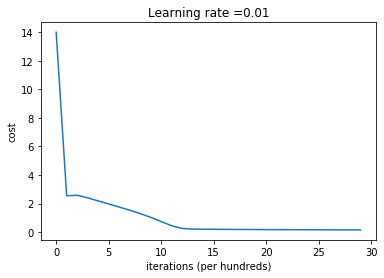

In [13]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()